<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [3]:
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

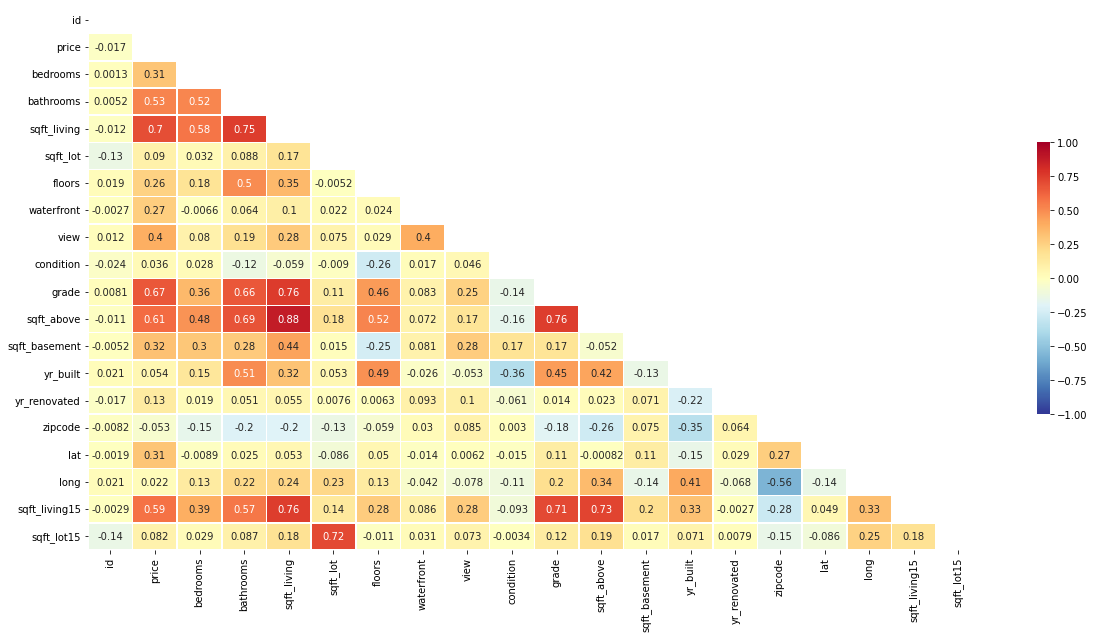

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

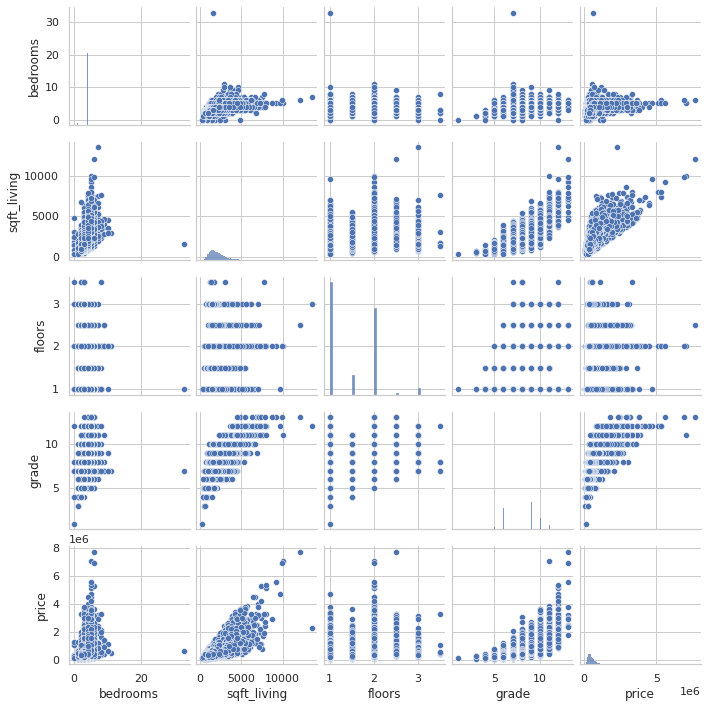

In [5]:
# 참고
# 시각화로 파악하기
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ["bedrooms", "sqft_living", "floors", "grade", "price"]
sns.pairplot(df[cols], height=2);


# 양의 상관관계/음의 상관관계를 보이는 피쳐로는 sqft_living, grade를 확인할 수 있다.

### ∴ 타겟과 상관관계가 가장 높은 특성의 이름 : sqft_living

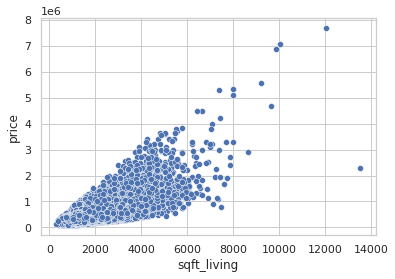

In [6]:
sns.scatterplot(x=df.sqft_living, y=df.price);

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

540088


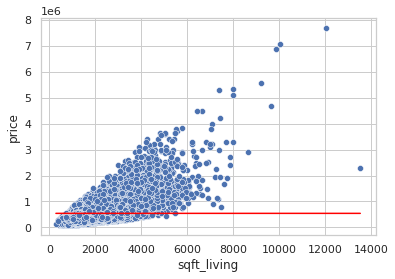

In [7]:
predict = df.price.mean() # 기준 모델 : 타겟(price)의 평균값
print(int(predict))

sns.scatterplot(x=df.sqft_living, y=df.price)
sns.lineplot(x=df.sqft_living, y=predict, color='red'); # 기준 모델 시각화

### ∴ 기준 모델의 값 : 540088

### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [8]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.linear_model import LinearRegression

model = LinearRegression()
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
X_test = [[15000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${round(float(y_pred))} 입니다.')

15000 sqft GrLivArea를 가지는 주택의 예상 가격은 $4165773 입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [9]:
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${round(float(y_pred))} 입니다.')

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $1078914 입니다.


In [11]:
X_test = [[x] for x in df['sqft_living']]
y_pred = model.predict(X_test)

In [12]:
y_pred

array([[287555.06702451],
       [677621.82640197],
       [172499.40418656],
       ...,
       [242655.29616092],
       [405416.96554144],
       [242655.29616092]])

In [13]:
from ipywidgets import interact

# 데코레이터 interact를 추가합니다.
@interact
def explain_prediction(sqft=(500,15000)):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${round(float(y_pred[0]))} (1 sqft당 추가금: ${round(float(model.coef_[0]))})"

    return pred

interactive(children=(IntSlider(value=7750, description='sqft', max=15000, min=500), Output()), _dom_classes=(…

In [14]:
round(float(model.coef_))

281

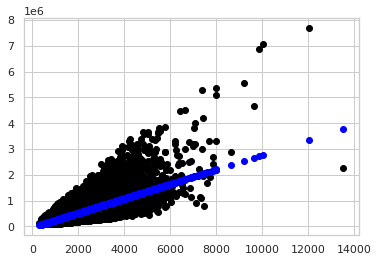

In [15]:
plt.scatter(X_train, y_train, color='black', linewidth=1)
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

### ∴ 회귀계수(coefficient)가 약 281이다. 이는 독립 변수(sqrt_living)가 1 증가하면 종속 변수(price)는 약 281 증가함을 의미한다.

### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [16]:
model_bathroom = LinearRegression()
feature = ['bathrooms']
X_train = df[feature]
model_bathroom.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
X_test = [[x] for x in df['bathrooms']]
y_pred = model_bathroom.predict(X_test)

In [18]:
y_pred

array([[261034.82483248],
       [573942.97021011],
       [261034.82483248],
       ...,
       [198453.19575695],
       [636524.59928563],
       [198453.19575695]])

In [19]:
round(float(model_bathroom.coef_))

250327

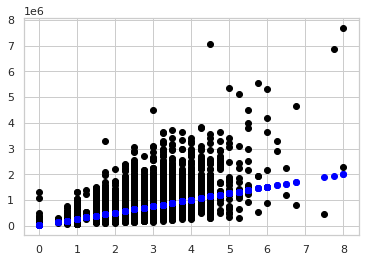

In [20]:
plt.scatter(X_train, y_train, color='black', linewidth=1)
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

### ∴ 회귀계수(coefficient)가 약 250327 이다. 이는 독립 변수(bathrooms)가 1 증가하면 종속 변수(price)는 약 250327 증가함을 의미한다.
### 주목할 부분은 이전의 독립 변수(sqrt_living)의 경우 수치형으로서 종속 변수(price)와 함께 연속적, 선형적인 관계를 보여주나, 지금의 독립 변수(bathrooms)는 욕실 개수로서 선형적인 값이 아니다.

## 🔥도전과제

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.

### 1. 단순선형회귀모델을 만들기 위해 전제 조건
1. 선형성(Linearity) : 독립 변수 X와 종속 변수 Y의 관계는 선형적이어야 한다(끊어지지 않고 직선으로 쭈욱 그려서 표현 가능해야 함).
2. 정규성(Normality) : 잔차(예측값과 실제 값의 차이)가 정규 분포여야 한다.
3. 동분산성(Homoscedasticity, Constant Variance) : 독립 변수 X의 모든 값에 대하여 잔차의 분산이 같아야 한다.
4. 독립성(Independence) : 모든 잔차는 독립적이어야 한다.
5. 외생성(Exogeneity, Fixed Features, "Given Constants") : 독립 변수 X는 주어진(고정된) 값이다.
그외 - 다중공선성 부재(Absence of multicollinearity) : 독립 변수들끼리 관련이 없어야 함(이것은 독립 변수가 여러 개인 다중 선형 회귀 분석의 전제 조건이라고 생각함)

### 2. OLS (Ordinary least Squares) : 최소제곱법
- 잔차(예측값과 실제 값의 차이)들을 제곱한 것의 합이 최소가 되게 만드는 방법
- 예측값이 실제 값에 최대한 잘 맞아야 진짜 예측을 잘 한다고 볼 수 있음
- 제곱하는 이유는 실제 값이 예측값보다 클 수도, 작을 수도 있기 때문임
- 제곱을 안 하고서 그냥 합하면 양수와 음수가 서로 상쇄되어 결과가 왜곡될 수 있음(분산 구할 때 제곱해주던 것과 마찬가지)


### **<참고>**

### 6) 

1. 단순선형회귀분석이란 단일 독립변수에 대한 종속변수의 추이를 분석하는 것이다.
2. 단순선형회귀모델은 이런 원리를 사용하여 주어진 feature와 target의 관계를 학습하고 정확한 수치(기울기, 절편)로 나타내는 것을 말한다.
3. target에 영향을 끼치는 feature가 무엇일지 잘 선택하는 것이 중요하다.
4. 객관적인 수치로 명확한 표현이 가능한 양적변수는 회귀분석에 유용하게 사용된다.
5. 질적변수도 더미 코딩을 통해 수치로 변환하거나, 전문가들이나 기존 연구에 의해 완성된 신뢰도 높은 방법으로 연속적 수치로 변환할 수 있다면 얼마든지 사용 가능하다.
6. 시각화를 통해 상관관계를 눈으로 파악하거나, 공분산 혹은 상관계수를 확인해 보거나, 좋은 특성을 분별하는 작업까지 코딩으로 처리하여 정확도를 높이면 좋은 특성을 선택할 수 있다.

### 7) 

1. 최소자승법(Ordinary Least Squares)은 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 벡터를 구하는 방법이다.
2. 분포되어 있는 데이터의 추세선을 그리고자 할 때 주로 사용된다.
3. 추세선과 데이터 벡터의 오차는 다양한 형태로 표현될 수 있지만 가장 보편적이고 쉽게 이해할 수 있는 지표는 잔차 제곱합이다.
4. 우리가 오늘 배웠던 단순선형회귀로만 제한하여 생각해 보자. 그리고 어떤 데이터값의 벡터가 $(x_i, y_i)$ 이고, 단순회귀선의 식이 $ \hat{y_i}=ax_i+b$ 라고 가정해보자.
5. 이 때, $x_1$에 따른 $\hat{y_1}$과 실제 $y_1$의 값은 동일하지 않다.
6. 모든 데이터를 지나도록 일차방정식 선을 그릴 수 있으면 좋겠지만, $\hat{y_1}  \ne y_1$인 것 처럼, 단순선형회귀분석으로는 불가능 한 일이다.
7. 따라서 $(x_i, y_i)$에서 $ \hat{y}=ax+b$ 까지의 거리, 즉 오차를 최소화 할 수 있는 방법을 사용하여 데이터의 분포를 가장 잘 반영하는 직선(회귀선)을 그리는 것으로 최선의 타협을 한다.
8. 여기서 해당 오차를 최소화 하는 방법 중 하나가 잔차제곱합을 최소화하는 최소자승법이다.
